In the cell bellow, we load the data and import the relevant libraries

In [2]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, plotly.express as px


df = pd.read_csv("laptop_price - dataset.csv")

Plot the prices of all laptops:
Using plotly express, we use the scatter function which creates an interactive scatter plot of the prices if the laptop, where if hovered over with the cursor, the user would see the name of the laptop along with its price. 


In [ ]:
fig = px.scatter(
    df,
    y='Price (Euro)',
    hover_name='Product'
)

fig.show()


Which company has on average the most expensive laptop? What is the average laptop price for each company?

    To do so, we must group the price of the laptops by the company and check the average of the price of laptops in each company.

In [ ]:
#We first check if the data in the price column are all the same type
df['Price (Euro)'].dtype


dtype('float64')

Seeing that they're all floats, we may proceed with grouping the columns

In [ ]:
company_average = df.groupby('Company')['Price (Euro)'].mean()
print(company_average.idxmax())

print("The average of the laptop price average by company are as follows:\n" \
f"{round(company_average, 2)}")

print(f"With {company_average.idxmax()} having the highest average of €{round(company_average.max(),2)}")



Razer
The average of the laptop price average by company are as follows:
Company
Acer          633.46
Apple        1564.20
Asus         1123.83
Chuwi         314.30
Dell         1199.23
Fujitsu       729.00
Google       1677.67
HP           1080.31
Huawei       1424.00
LG           2099.00
Lenovo       1093.86
MSI          1728.91
Mediacom      295.00
Microsoft    1612.31
Razer        3346.14
Samsung      1413.44
Toshiba      1267.81
Vero          217.42
Xiaomi       1133.46
Name: Price (Euro), dtype: float64
With Razer having the highest average of €3346.14


Find the different types of Operating systems present in the data - under the column name "OpSys".
    Please note - there are operating systems that are the same systems and just written differently in the column - please fix them to be uniform.


We first need to find the unique values of the column of "OpSys"

In [6]:
df.OpSys.unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

The correct way to divide these operating system would be:
macOS -> macOS, Mac OS X
Windows -> Windows 10, Windows 10 S, Windows 7
Linux -> Linux, Chrome OS
Mobile OS -> Android
No OS -> No OS


Thus, we use the loc function to locate each specific value, and replace it with the relevant one. 

First we'll use the .strip() function to ensure standardization and a clean output, and then using the loc function, we'll find the cells that contain a relevant word and replace it with the title of the operating system. e.g. we'll look for 'mac' and replace it with macOS

In [ ]:
df['OpSys'] = df['OpSys'].str.strip() 

df.loc[df['OpSys'].str.contains('mac', case=False, na=False), 'OpSys'] = 'macOS'
df.loc[df['OpSys'].str.contains('windows', case=False, na=False), 'OpSys'] = 'Windows'
df.loc[df['OpSys'].str.contains('linux|chrome', case=False, na=False), 'OpSys'] = 'Linux'
df.loc[df['OpSys'].str.contains('android', case=False, na=False), 'OpSys'] = 'Android'
df.loc[df['OpSys'].str.contains('no os', case=False, na=False), 'OpSys'] = 'No OS'

print(f"The different operating systems in the data are: {df.OpSys.unique()}")

The different operating systems in the data are: ['macOS' 'No OS' 'Windows' 'Linux' 'Android']


Plot for each of the operating system types the distribution of the prices, so that the number of plots equals to the number of unique operating systems.

    To do so, in a loop, we go over all the unique values in the OpSys and create a box plot for each unique datum, where the green dotted line represents the mean while the orange represents the median
    

OpSys
Android     434.000000
Linux       600.177529
No OS       587.973333
Windows    1202.132652
macOS      1564.198571
Name: Price (Euro), dtype: float64


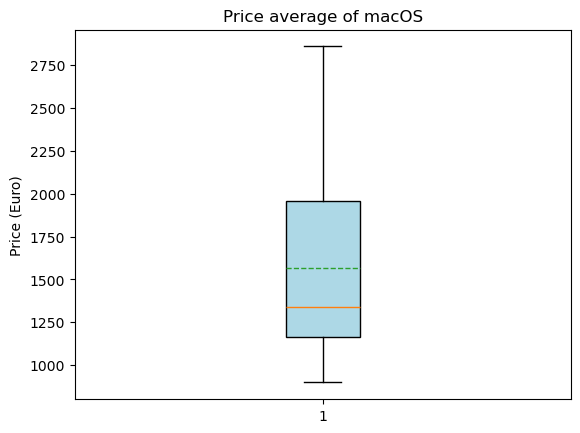

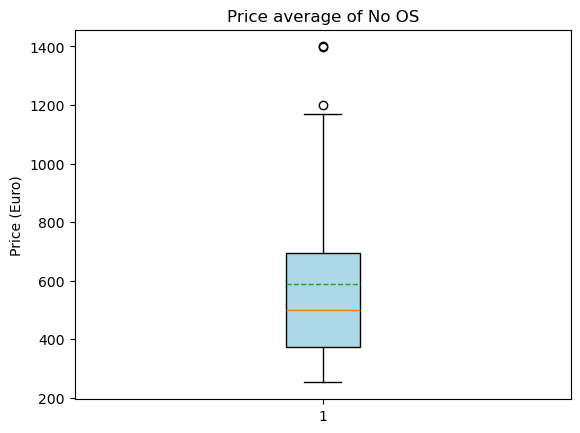

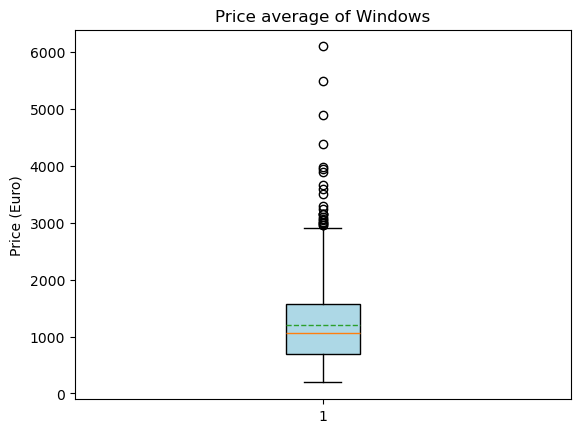

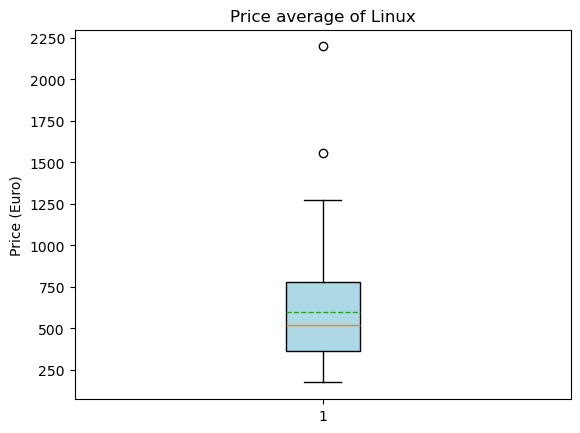

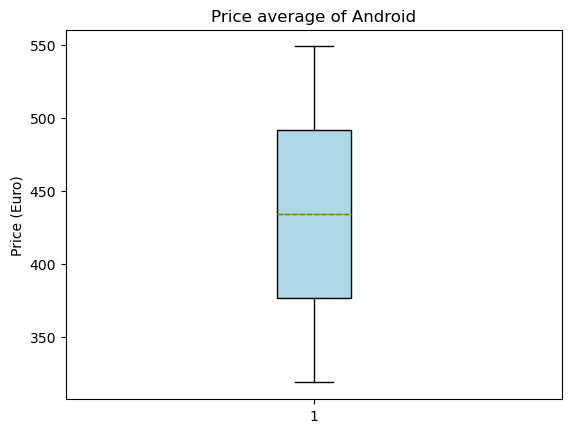

In [8]:
print(df.groupby('OpSys')['Price (Euro)'].mean())
for i in df.OpSys.unique():
    opsys_df = pd.DataFrame()
    opsys_df = df.loc[df['OpSys'].str.contains(i, case=False, na=False)]    
    plt.boxplot(opsys_df['Price (Euro)'],boxprops=dict(facecolor='lightblue', color='black'), showmeans=True, meanline=True, patch_artist=True )


    plt.title(f"Price average of {i}")
    plt.ylabel('Price (Euro)')

    plt.show()
    

What is the relationship between RAM and computer price? add an adequate plot to support your findings. <<< check data for outliers, what would be considered as an outlier? How will you detect it ? >>>
    First, we must consider what values are considered outliers?
    In academic literature, they usually consider the first and fourth quadrant percentile as outliers.
    Thus, We'll update our data where we conduct a pearson correlation test only on the second and third percentile of the data.
    We then look at the correlation plot to check for linearity. 

In [ ]:
plt.figure(figsize=(8, 6))

# Use seaborn's regplot to plot a scatter plot with a regression line
df_correlation = pd.DataFrame()
df_correlation['RAM (GB)'] = df['RAM (GB)']
df_correlation['Price (Euro)'] = df['Price (Euro)']


lower_percentile = df_correlation['Price (Euro)'].quantile(0.25)
upper_percentile = df_correlation['Price (Euro)'].quantile(0.75)

new_correlation_df = df[(df_correlation['Price (Euro)'] > lower_percentile) & (df_correlation['Price (Euro)'] < upper_percentile)]



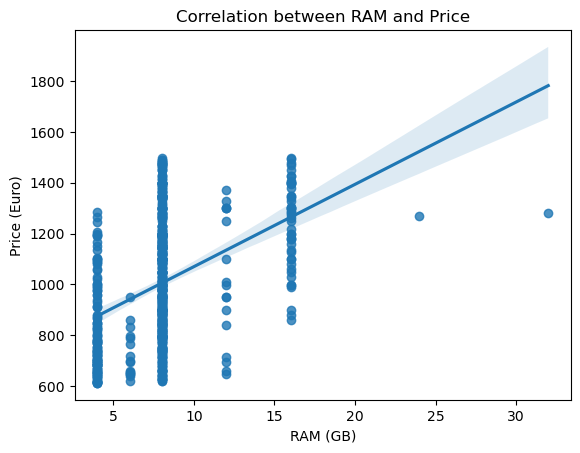

In [ ]:
#We'll plot the df to check for linearity

sns.regplot(x='RAM (GB)', y='Price (Euro)', data=new_correlation_df)

plt.title('Correlation between RAM and Price')
plt.xlabel('RAM (GB)')
plt.ylabel('Price (Euro)')
plt.show()

Looking at the graph, there isn't an obvious linear relationship between the two, therefore a rainbow test must be conducted to check for linearity. If the null hypothesis is rejected, then there isn't a linear relationship.
We shall proceed by importing the statsmodel and statsmodels.stats.diagnostic library. 

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow

# y = dependent variable (Price)
y = new_correlation_df['Price (Euro)']

# X = independent variable (RAM)
X = new_correlation_df[['RAM (GB)']]

# Add intercept for OLS
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

statistic, p_value = linear_rainbow(model)
print("Rainbow statistic:", statistic)
print("p-value:", p_value)

if p_value < 0.05:
    print("Reject H0: evidence of nonlinearity")
else:
    print("Fail to reject H0: linear model seems adequate")


Rainbow statistic: 0.8932540495466224
p-value: 0.842319795235201
Fail to reject H0: linear model seems adequate


Seeing that the p-value is not significant, we can proceed with a linear model.

In [27]:
from scipy.stats import pearsonr

r, p = pearsonr(new_correlation_df['RAM (GB)'], new_correlation_df['Price (Euro)'])
n_correlation = len(new_correlation_df)

print(f" The relationship between RAM and Price is significant with r = {r:.2f} and p = {p} with n = {n_correlation}")

#, n = {n}

 The relationship between RAM and Price is significant with r = 0.42 and p = 3.673116765931356e-28 with n = 636


Create a new column for the dataframe called "Storage type" that extracts the storage type from the column "Memory".
    For example, in the first row in the column "Memory" it states "128GB SSD", the new column will have just "SSD" in its first row.

It's important to understand the data we're dealing with. So we'll use the unique() function to investigate.


In [11]:
print(df['Memory'].unique())

['128GB SSD' '128GB Flash Storage' '256GB SSD' '512GB SSD' '500GB HDD'
 '256GB Flash Storage' '1TB HDD' '32GB Flash Storage'
 '128GB SSD +  1TB HDD' '256GB SSD +  256GB SSD' '64GB Flash Storage'
 '256GB SSD +  1TB HDD' '256GB SSD +  2TB HDD' '32GB SSD' '2TB HDD'
 '64GB SSD' '1.0TB Hybrid' '512GB SSD +  1TB HDD' '1TB SSD'
 '256GB SSD +  500GB HDD' '128GB SSD +  2TB HDD' '512GB SSD +  512GB SSD'
 '16GB SSD' '16GB Flash Storage' '512GB SSD +  256GB SSD'
 '512GB SSD +  2TB HDD' '64GB Flash Storage +  1TB HDD' '180GB SSD'
 '1TB HDD +  1TB HDD' '32GB HDD' '1TB SSD +  1TB HDD'
 '512GB Flash Storage' '128GB HDD' '240GB SSD' '8GB SSD' '508GB Hybrid'
 '1.0TB HDD' '512GB SSD +  1.0TB Hybrid' '256GB SSD +  1.0TB Hybrid']


From the output, we can see that we have different types of answers with three specific patterns.
    1. After the amount of storage, it is followed with the storage type (e.g. 128GB SSD)
    2. After the amount of storage, it is followed by "Flash Storage". It's important to treat it as its own special case because there's a space between flash and storage.
    3. Two different storage types with a '+' between the types. (e.g. 512GB SSD +  1.0TB Hybrid)
    We'll use a string function which replaces all numbers, 'gb'and 'TB' with '' in turn erasing them-> This is done to get ride of the amount of storage so that we're left with the storage type only.
    We can see that if a cell contains '+', we may have an excess of spaces. Thus in those cells using the .loc function, we'll erase the spaces and replace the '+' with ' + ' for a cleaner look

In [ ]:
df['Storage Type'] = (
    df['Memory']
    .str.replace(r'\d+', '', regex=True)
    .str.replace(r'gb', '', regex=True, case=False)
    .str.replace(r'tb', '', regex=True, case=False)    # remove "TB" (case-insensitive)
    .str.strip()
)

df.loc[
    df['Storage Type'].str.contains(r'\+', na=False), 
    'Storage Type'
] = (df.loc[
    df['Storage Type'].str.contains(r'\+', na=False), 
    'Storage Type'
].str.replace(' ', '', regex=False)
.str.replace('+', ' + ', regex=False) ) #To give it a cleaner look

df.loc[
    df['Storage Type'].str.contains(r'\SSD + SSD', na=False), 
    'Storage Type'] = 


print(df['Storage Type'][28])


SSD + SSD
